In [1]:
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Peek at the data
print(df.head())
print(df.info())
print(df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [2]:
# Drop columns not useful for prediction
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Fill missing Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Embarked with mode (most common port)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

print(df.isnull().sum())  # check for missing data


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


/tmp/ipython-input-3038571303.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-3038571303.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode Sex
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])  # Male=1, Female=0

# One-hot encode Embarked
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

print(df.head())


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    1  22.0      1      0   7.2500       False        True
1         1       1    0  38.0      1      0  71.2833       False       False
2         1       3    0  26.0      0      0   7.9250       False        True
3         1       1    0  35.0      1      0  53.1000       False        True
4         0       3    1  35.0      0      0   8.0500       False        True


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop("Survived", axis=1)  # Features
y = df["Survived"]               # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)


(712, 8) (179, 8)


In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[98 12]
 [23 46]]


In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[98 12]
 [23 46]]


In [16]:
# Feature engineering
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

# Update features
X = df.drop("Survived", axis=1)
y = df["Survived"]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy with FamilySize & IsAlone:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy with FamilySize & IsAlone: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[97 13]
 [22 47]]


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "SVC": SVC(kernel="rbf", random_state=42)
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.3f}")


Logistic Regression Accuracy: 0.804
Random Forest Accuracy: 0.793
SVC Accuracy: 0.626


In [23]:
for n in [50, 100, 200]:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{n} trees → test accuracy {acc:.3f}")

50 trees → test accuracy 0.793
100 trees → test accuracy 0.821
200 trees → test accuracy 0.821


# MNIST

Shape of X: (70000, 784)
Shape of y: (70000,)


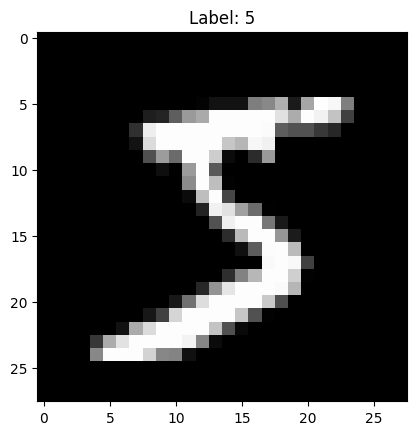

In [27]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Load MNIST from OpenML
mnist = fetch_openml('mnist_784', version=1)

X, y = mnist.data, mnist.target.astype(int)  # X: pixel values, y: digit labels

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Show a sample digit
plt.imshow(X.iloc[0].to_numpy().reshape(28,28), cmap="gray")
plt.title(f"Label: {y.iloc[0]}")
plt.show()


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale pixel values
X_scaled = X / 255.0

# Train/test split (10k test images)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=10000, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)


(60000, 784) (10000, 784)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print("Logistic Regression accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression accuracy: 0.9235


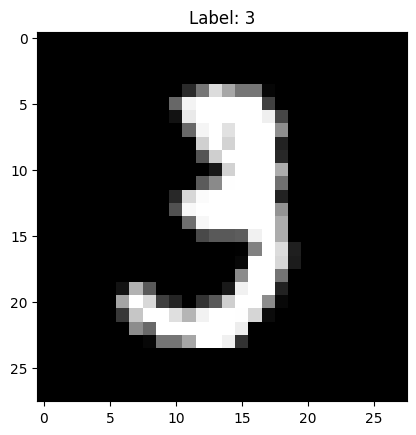

In [30]:
plt.imshow(X.iloc[10].to_numpy().reshape(28,28), cmap="gray")
plt.title(f"Label: {y.iloc[10]}")
plt.show()

In [33]:
y_pred = log_reg.predict((X.iloc[10]).reshaspe((724,1)))

NameError: name 'np' is not defined